# Iris의 세 가지 품종 분류하기

## 데이터 준비

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris)) # dir() : 객체가 어떤 변수와 메서드를 가지고 있는지 나열

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris_data = iris.data

print(iris_data.shape)

(150, 4)


In [6]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.filename

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv'

## 모델 학습을 위한 train, label set 준비

In [13]:
import pandas as pd

print(pd.__version__)

1.1.5


In [14]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# train_test_split()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(iris_data,
                                                                      iris_label,
                                                                      test_size=0.2,
                                                                      random_state=7)

print('train_input 개수:', len(train_input), 'test_input 개수:', len(test_input))

train_input 개수: 120 test_input 개수: 30


In [18]:
train_input.shape, train_target.shape

((120, 4), (120,))

In [19]:
test_input.shape, test_target.shape

((30, 4), (30,))

In [21]:
train_target, test_target

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

## 모델 학습시키기

In [22]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [23]:
decision_tree.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

## 모델 평가하기

In [25]:
test_pred = decision_tree.predict(test_input)
test_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [26]:
test_target

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [28]:
# Accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_target, test_pred)
accuracy

0.9

In [30]:
from sklearn.metrics import classification_report

print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# 다른 모델을 사용하여 분류 해보기

In [34]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

train_input, test_input, train_target, test_target = train_test_split(iris_data,
                                                                      iris_label,
                                                                      test_size=0.2,
                                                                      random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(train_input, train_target)
test_pred = random_forest.predict(test_input)

print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [35]:
# Support Vector Machine (SVM)

from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [37]:
svm_model.fit(train_input, train_target)
test_pred = svm_model.predict(test_input)

print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



In [38]:
# SGDClassifier

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [39]:
sgd_model.fit(train_input, train_target)
test_pred = sgd_model.predict(test_input)

print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92        12
           2       1.00      0.71      0.83         7

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



In [40]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [41]:
logistic_model.fit(train_input, train_target)
test_pred = logistic_model.predict(test_input)

print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## 다양하게 평가해 보기

In [42]:
# 정확도에는 함정이 있다.

from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [44]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [45]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

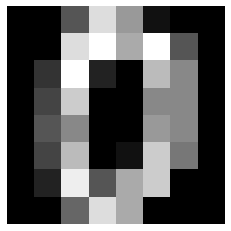

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline # 이미지를 현재 화면에 보여주기 위함

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()



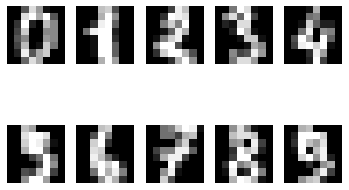

In [51]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
  plt.axis('off')
plt.show()

In [52]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(random_state=15)
train_input, test_input, train_target, test_target = train_test_split(digits_data,
                                                                      new_label,
                                                                      test_size=0.2,
                                                                      random_state=15)
tree_model.fit(train_input, train_target)
test_pred = tree_model.predict(test_input)

accuracy = accuracy_score(test_target, test_pred)
accuracy

# target의 90%가 0이므로 이러한 수치가 출력된다.

0.9388888888888889

In [56]:
fake_pred = [0] * len(test_pred)

accuracy = accuracy_score(test_target, fake_pred)
accuracy

0.925

## 정답과 오답에도 종류가 있다.

In [58]:
# 오차행렬(confusion matrix)

from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, test_pred)

array([[320,  13],
       [  9,  18]])

In [59]:
confusion_matrix(test_target, fake_pred)

array([[333,   0],
       [ 27,   0]])

In [60]:
from sklearn.metrics import classification_report

print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [61]:
from sklearn.metrics import classification_report

print(classification_report(test_target, fake_pred)) # 하나도 예측하지 못했다.

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
accuracy_score(test_target, test_pred), accuracy_score(test_target, fake_pred) # 하지만 정확도는 비슷하게 나왔다.
                                                                               # 모델의 성능은 정확도만으로 평가하면 안된다.
                                                                               # 특히 target data가 불균등하게 분포되어 있으면 더더욱!

(0.9388888888888889, 0.925)